# DeepFace Personal Notes
*[GitHub Repo
](https://github.com/serengil/deepface)*

---
## DeepFace Read Me Tutorial
*Source: [DeepFace: A Facial Recognition Library for Python
](https://www.youtube.com/watch?v=WnUVYQP4h44&list=PLsS_1RYmYQQFdWqxQggXHynP1rqaYXv_E)*

**Installation & Libraries**

In [3]:
# Install Deep Face
# !pip install deepface

# also made me install tf_keras (see Error 1 & Error 2)
# !pip install tf-keras

from deepface import DeepFace

**Adding Images**

In [4]:
# this is just to make it easier to access dataset images in folder
img1 = 'dataset/img1.jpg'
img2 = 'dataset/img2.jpg'

**General Information**
- Face verification = "Is this person who they say they are?" (comparing two faces)
- Face recognition = "Who is this person?" (comparing one face against many in a database)

### Facial Verification

In [7]:
result = DeepFace.verify(img1_path = img1, img2_path = img2)

In [9]:
print("result: ", result)

result:  {'verified': True, 'distance': 0.4128016713926258, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 339, 'y': 218, 'w': 768, 'h': 768, 'left_eye': (850, 524), 'right_eye': (571, 517)}, 'img2': {'x': 524, 'y': 201, 'w': 491, 'h': 491, 'left_eye': (858, 388), 'right_eye': (663, 390)}}, 'time': 9.34}


In [11]:
# Note: result is a dictionary (dict) type, coming in key:value pairs
# verification = result[0] --> Will not work
verification = result['verified']    # --> Will work
print(verification)

True


**Details on Face Verification**

`DeepFace.verify()`

<u>Arguments</u>
- img1_path (str or np.ndarray or IO[bytes] or List[float]): Path to the first image.
        Accepts exact image path as a string, numpy array (BGR), a file object that supports
        at least `.read` and is opened in binary mode, base64 encoded images
        or pre-calculated embeddings.
- img2_path (str or np.ndarray or IO[bytes] or List[float]): Path to the second image. Same as above

<details><summary>Optional Arguments</summary>
    
    - model_name (str): Model for face recognition. Options: VGG-Face, Facenet, Facenet512,
            OpenFace, DeepFace, DeepID, Dlib, ArcFace, SFace and GhostFaceNet (default is VGG-Face).
    
    - detector_backend (string): face detector backend. Options: 'opencv', 'retinaface',
            'mtcnn', 'ssd', 'dlib', 'mediapipe', 'yolov8', 'yolov11n', 'yolov11s', 'yolov11m',
            'centerface' or 'skip' (default is opencv).
            
    - distance_metric (string): Metric for measuring similarity. Options: 'cosine',
            'euclidean', 'euclidean_l2', 'angular' (default is cosine).
            
    - enforce_detection (boolean): If no face is detected in an image, raise an exception.
            Set to False to avoid the exception for low-resolution images (default is True).
    - align (bool): Flag to enable face alignment (default is True).
    
    - expand_percentage (int): expand detected facial area with a percentage (default is 0).
    
    - normalization (string): Normalize the input image before feeding it to the model.
            Options: base, raw, Facenet, Facenet2018, VGGFace, VGGFace2, ArcFace (default is base)
            
    - silent (boolean): Suppress or allow some log messages for a quieter analysis process
            (default is False).
            
    - threshold (float): Specify a threshold to determine whether a pair represents the same
            person or different individuals. This threshold is used for comparing distances.
            If left unset, default pre-tuned threshold values will be applied based on the specified
            model name and distance metric (default is None).
            
    - anti_spoofing (boolean): Flag to enable anti spoofing (default is False).
</details>

---

`print(verification)`

<u>Returns</u>
- 'verified' (bool): Indicates whether the images represent the same person (True)
    or different persons (False).

- 'distance' (float): The distance measure between the face vectors.
    A lower distance indicates higher similarity.

- 'threshold' (float): The maximum threshold used for verification.
    If the distance is below this threshold, the images are considered a match.

- 'model' (str): The chosen face recognition model.

- 'distance_metric' (str): The chosen similarity metric for measuring distances.

- 'facial_areas' (dict): Rectangular regions of interest for faces in both images.
    - 'img1': {'x': int, 'y': int, 'w': int, 'h': int}
            Region of interest for the first image.
    - 'img2': {'x': int, 'y': int, 'w': int, 'h': int}
            Region of interest for the second image.

- 'time' (float): Time taken for the verification process in seconds.

---
<details><summary><u>Other Details</u></summary>

</details>

---

### Facial Recognition

In [182]:
dfs = DeepFace.find(
  img_path = "dataset/img1.jpg", db_path = "dataset"
)
print(dfs)

25-05-16 14:26:04 - Found 1 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|███████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.92s/it]


25-05-16 14:26:07 - There are now 73 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-05-16 14:26:07 - Searching dataset/img1.jpg in 73 length datastore
25-05-16 14:26:10 - find function duration 6.610401391983032 seconds
[                                          identity  \
0                                 dataset\img1.jpg   
1   dataset\.ipynb_checkpoints\img1-checkpoint.jpg   
2                                 dataset\img2.jpg   
3                                 dataset\img4.jpg   
4                                 dataset\img6.jpg   
5                                 dataset\img7.jpg   
6                   dataset\selfie-many-people.jpg   
7                               dataset\couple.jpg   
8                     dataset\img11_reflection.jpg   
9                                 dataset\img5.jpg   
10                               dataset\img11.jpg   
11                               dataset\img10.jpg   

                            

**Details on Face Recognition**

`DeepFace.find()`

<u>Arguments</u>
- img_path (str or np.ndarray or IO[bytes]): The exact path to the image, a numpy array
            in BGR format, a file object that supports at least `.read` and is opened in binary
            mode, or a base64 encoded image. If the source image contains multiple
            faces, the result will include information for each detected face.
- db_path (string): Path to the folder containing image files. All detected faces
            in the database will be considered in the decision-making process.

<details><summary>Optional Arguments</summary>
    
    - model_name (str): Model for face recognition. Options: VGG-Face, Facenet, Facenet512,
            OpenFace, DeepFace, DeepID, Dlib, ArcFace, SFace and GhostFaceNet (default is VGG-Face).

    - distance_metric (string): Metric for measuring similarity. Options: 'cosine',
            'euclidean', 'euclidean_l2', 'angular' (default is cosine).

    - enforce_detection (boolean): If no face is detected in an image, raise an exception.
            Set to False to avoid the exception for low-resolution images (default is True).

    - detector_backend (string): face detector backend. Options: 'opencv', 'retinaface',
            'mtcnn', 'ssd', 'dlib', 'mediapipe', 'yolov8', 'yolov11n', 'yolov11s', 'yolov11m',
            'centerface' or 'skip' (default is opencv).

    - align (boolean): Perform alignment based on the eye positions (default is True).

    - expand_percentage (int): expand detected facial area with a percentage (default is 0).

    - threshold (float): Specify a threshold to determine whether a pair represents the same
            person or different individuals. This threshold is used for comparing distances.
            If left unset, default pre-tuned threshold values will be applied based on the specified
            model name and distance metric (default is None).

    - normalization (string): Normalize the input image before feeding it to the model.
            Options: base, raw, Facenet, Facenet2018, VGGFace, VGGFace2, ArcFace (default is base).

    - silent (boolean): Suppress or allow some log messages for a quieter analysis process
            (default is False).

    - refresh_database (boolean): Synchronizes the images representation (pkl) file with the
            directory/db files, if set to false, it will ignore any file changes inside the db_path
            (default is True).

    - anti_spoofing (boolean): Flag to enable anti spoofing (default is False).
</details>

---

`print(dfs)`

<u>Returns</u>
- results (List[pd.DataFrame] or List[List[Dict[str, Any]]]):
            A list of pandas dataframes (if `batched=False`) or
            a list of dicts (if `batched=True`).
            Each dataframe or dict corresponds to the identity information for
            an individual detected in the source image.

            Note: If you have a large database and/or a source photo with many faces,
            use `batched=True`, as it is optimized for large batch processing.
            Please pay attention that when using `batched=True`, the function returns
            a list of dicts (not a list of DataFrames),
            but with the same keys as the columns in the DataFrame.

            The DataFrame columns or dict keys include:

- 'identity': Identity label of the detected individual.

- 'target_x', 'target_y', 'target_w', 'target_h': Bounding box coordinates of the
        target face in the database.

- 'source_x', 'source_y', 'source_w', 'source_h': Bounding box coordinates of the
        detected face in the source image.

- 'threshold': threshold to determine a pair whether same person or different persons

- 'distance': Similarity score between the faces based on the
        specified model and distance metric

---
<details><summary><u>Other Details</u></summary>

</details>

---

### Other Functions

#### Facial Analysis

In [ ]:
# Will download a million things first time
objs = DeepFace.analyze(
  img_path = "dataset/img1.jpg", actions = ['age', 'gender', 'race', 'emotion']
)

In [ ]:
print(objs)

---
## DeepFace Intro Article Tutorial
*Source: [A Gentle Introduction to Face Recognition in Deep Learning
](https://sefiks.com/2020/05/01/a-gentle-introduction-to-face-recognition-in-deep-learning/)*

Covers 4 aspects of face recognition: 
- detection
- alignment
- representation
- verification. 

Further articles that go more in depth on each one are linked below (to potentially go through, so listed as seperate sections)


**Installations & Libraries Used:**

In [3]:
#!pip install deepface
from deepface import DeepFace
import matplotlib.pyplot as plt
import time

### Detection (COMPLETE)

`DeepFace.extract_faces()`  
Extract faces from a given image.

<u>Arguments</u>
- `img_path`: Path to the first image. (REQUIRED)
- `detector_backened` (string): face detector backend. Default is opencv
  - Options consist of 'opencv', 'retinaface','mtcnn', 'ssd', 'dlib', 'mediapipe', 'yolov8', 'yolov11n', 'yolov11s', 'yolov11m','centerface' or 'skip'
- `enforce_detection` (boolean): If no face is detected in an image, raise an exception.
            Set to False to avoid the exception for low-resolution images (default is True).
- `align` (bool): Flag to enable face alignment (default is True).
- `expand_percentage` (int): expand detected facial area with a percentage (default is 0).
- `grayscale` (boolean): (Deprecated) Flag to convert the output face image to grayscale (default is False).
- `color_face` (string): Color to return face image output. Options: 'rgb', 'bgr' or 'gray'
            (default is 'rgb').
- `normalize_face` (boolean): Flag to enable normalization (divide by 255) of the output
            face image output face image normalization (default is True).
- `anti_spoofing` (boolean): Flag to enable anti spoofing (default is False).

<u>Returns</u>
- `results (List[Dict[str, Any]])`: A list of dictionaries, see dropdown for details.
 <details><summary>Dictionaries & Details</summary>
     <ul>
        <li>"face" (np.ndarray): The detected face as a NumPy array.</li>
        <li>"facial_area" (Dict[str, Any]): The detected face's regions as a dictionary containing:
            <ul>
               <li>keys 'x', 'y', 'w', 'h' with int values</li>
               <li>keys 'left_eye', 'right_eye' with a tuple of 2 ints as values. left and right eyes
                are eyes on the left and right respectively with respect to the person itself
                instead of observer.</li>
            </ul>
        </li>
        <li>"confidence" (float): The confidence score associated with the detected face.</li>
        <li>"is_real" (boolean): antispoofing analyze result. this key is just available in the
            result only if anti_spoofing is set to True in input arguments.</li>
        <li>"antispoof_score" (float): score of antispoofing analyze result. this key is
            just available in the result only if anti_spoofing is set to True in input arguments.</li>
    </ul>
  </details>

Using:  opencv


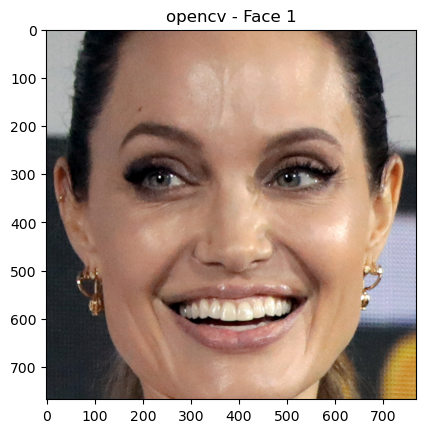

Time Taken:  2.7938179969787598 seconds
**********************************
Using:  ssd


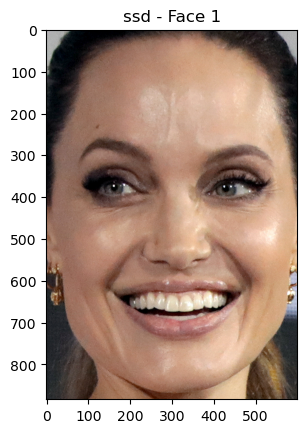

Time Taken:  1.9932329654693604 seconds
**********************************
Using:  mtcnn


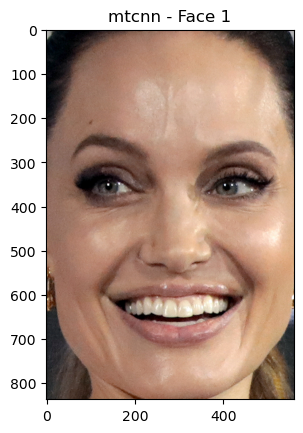

Time Taken:  39.78602910041809 seconds
**********************************


In [82]:
img1 = 'dataset/img1.jpg'

detectors = ['opencv', 'ssd', 'mtcnn']
# detectors = ['opencv', 'ssd', 'dlib', 'mtcnn'] --> removed dlib (for being annoying)

for detector in detectors:
    print("Using: ", detector)

    start = time.time()
    faces = DeepFace.extract_faces(img_path = img1, detector_backend = detector)
    end = time.time()

    #plt.imshow(img) --> will NOT work (because it returns a list of dictionaries, not a single image array)
    # plt.show()
    
    if faces:
        for i, face_dict in enumerate(faces): # loop through ever dictionary in list
            plt.imshow(face_dict["face"]) # show the "face" of the current face_dict
            plt.title(f"{detector} - Face {i+1}")  # add title to face plot
            plt.show()
    else:
        print("No face detected.")

    print("Time Taken: ", end-start, "seconds")
    print("**********************************")


<b>*Observations from Code*</b>
- ssd is the fastest
- opencv is also relatively fast
- mtcnn (and supposedly dlib) take the longest
- time on my computer is significantly longer than tutorial guy's
  - e.g. opencv is 0.88s vs 2.79s and mtcnn is 5.60s vs 39.79
  - assuming my computer is just not as fast/advanced  (?)
- Below, uses Face Verify. Now, according to tutorial mtcnn should be most robust (e.g. least distance) which makes up more for it's time taken. However, that doesn't seem to be the case
  - Current Theory: the tutorial is from 5 years ago, and opencv has probably gotten much better in that time

**Face Recognition Version**

*(including minimal detail because covered above)*

Using:  opencv


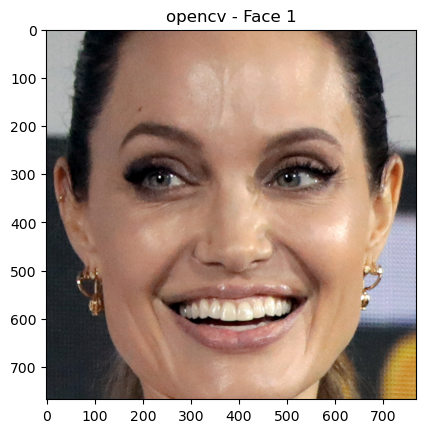

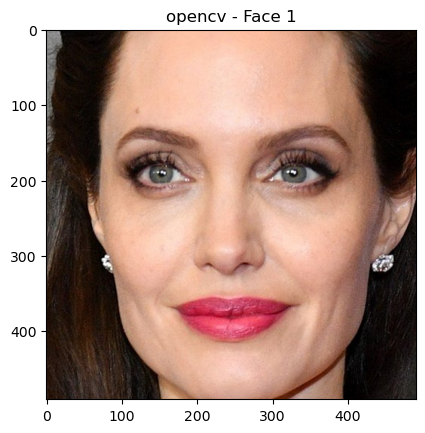

{'verified': True, 'distance': 0.4128016713926258, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 339, 'y': 218, 'w': 768, 'h': 768, 'left_eye': (850, 524), 'right_eye': (571, 517)}, 'img2': {'x': 524, 'y': 201, 'w': 491, 'h': 491, 'left_eye': (858, 388), 'right_eye': (663, 390)}}, 'time': 12.63}
Time Taken:  7.080718040466309 seconds
**********************************
Using:  ssd


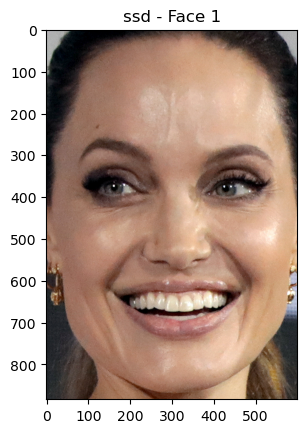

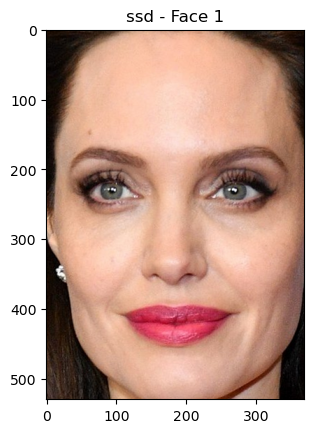

{'verified': True, 'distance': 0.42578746413444424, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'ssd', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 414, 'y': 149, 'w': 599, 'h': 884, 'left_eye': (853, 523), 'right_eye': (577, 520)}, 'img2': {'x': 583, 'y': 161, 'w': 369, 'h': 530, 'left_eye': (856, 388), 'right_eye': (664, 391)}}, 'time': 3.68}
Time Taken:  3.096611976623535 seconds
**********************************
Using:  mtcnn


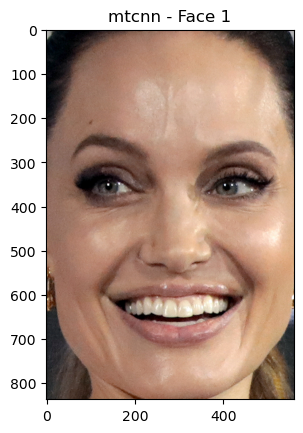

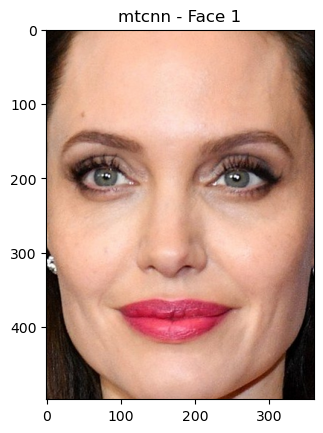

{'verified': True, 'distance': 0.45343301437083605, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'mtcnn', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 435, 'y': 172, 'w': 560, 'h': 837, 'left_eye': (863, 522), 'right_eye': (582, 518)}, 'img2': {'x': 597, 'y': 193, 'w': 360, 'h': 498, 'left_eye': (852, 388), 'right_eye': (677, 392)}}, 'time': 44.44}
Time Taken:  43.95490384101868 seconds
**********************************


In [89]:
img1 = 'dataset/img1.jpg'
img2 = 'dataset/img2.jpg'

detectors = ['opencv', 'ssd', 'mtcnn']
# detectors = ['opencv', 'ssd', 'dlib', 'mtcnn'] --> removed dlib (for being annoying)

for detector in detectors:
    print("Using: ", detector)

    obj = DeepFace.verify(img1, img2, detector_backend = detector)

    start = time.time()
    faces1 = DeepFace.extract_faces(img_path = img1, detector_backend = detector)
    faces2 = DeepFace.extract_faces(img_path = img2, detector_backend = detector)
    end = time.time()
    
    if faces1:
        for i, face_dict in enumerate(faces1): # loop through ever dictionary in list
            plt.imshow(face_dict["face"]) # show the "face" of the current face_dict
            plt.title(f"{detector} - Face {i+1}")  # add title to face plot
            plt.show()
    else:
        print("No face in img1 detected.")

    if faces2:
        for i, face_dict in enumerate(faces2): # loop through ever dictionary in list
            plt.imshow(face_dict["face"]) # show the "face" of the current face_dict
            plt.title(f"{detector} - Face {i+1}")  # add title to face plot
            plt.show()
    else:
        print("No face in img2 detected.")

    print(obj)
    
    print("Time Taken: ", end-start, "seconds")
    print("**********************************")


### Alignment

### Representation

### Verification

---
## DeepFace & OpenCV Together
*Source: [None
]()*

<em>**General Notes**
- <em>Seems to be literally the same thing
- <em>Just replace the img variable with the cv2.imread image
- <em>Need to test for videos...</em>

In [9]:
import cv2

In [171]:
img_CV1 = cv2.imread('newAngelinaJolie.jpg')
img1 = 'dataset/img1.jpg'

cv2.imshow('new Angelina Jolie', img_CV1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [173]:
compare = DeepFace.verify(img1, img_CV1)
print(compare)

{'verified': True, 'distance': 0.566233779473067, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 339, 'y': 218, 'w': 768, 'h': 768, 'left_eye': (850, 524), 'right_eye': (571, 517)}, 'img2': {'x': 673, 'y': 138, 'w': 419, 'h': 419, 'left_eye': (957, 320), 'right_eye': (810, 284)}}, 'time': 6.53}


In [184]:
find = DeepFace.find(
  img_path = img_CV1, db_path = "dataset"
)
print(find)

25-05-16 14:28:12 - Searching [[[ 26  24  23]
  [ 26  24  23]
  [ 24  22  21]
  ...
  [ 12  10   9]
  [ 12  10   9]
  [ 12  10   9]]

 [[ 26  24  23]
  [ 25  23  22]
  [ 24  22  21]
  ...
  [ 12  10   9]
  [ 12  10   9]
  [ 12  10   9]]

 [[ 25  23  22]
  [ 24  22  21]
  [ 23  21  20]
  ...
  [ 12  10   9]
  [ 12  10   9]
  [ 12  10   9]]

 ...

 [[ 75  72  74]
  [ 78  76  76]
  [ 81  78  80]
  ...
  [ 79  81 105]
  [ 79  80 106]
  [ 79  80 106]]

 [[ 84  79  80]
  [ 86  82  81]
  [ 89  84  85]
  ...
  [ 81  83 107]
  [ 81  82 108]
  [ 81  82 108]]

 [[ 88  84  83]
  [ 90  86  85]
  [ 93  89  88]
  ...
  [ 81  83 107]
  [ 81  82 108]
  [ 81  82 108]]] in 73 length datastore
25-05-16 14:28:15 - find function duration 2.575411319732666 seconds
[                                          identity  \
0                                 dataset\img6.jpg   
1                                 dataset\img2.jpg   
2                                 dataset\img7.jpg   
3                              

---
## DeepFace Real-Time Analysis
*Source: [Real-Time Face Recognition and Facial Attribute Analysis (Age, Gender, Emotion) in Python
](https://www.youtube.com/watch?v=-c9sSJcx6wI&list=PLsS_1RYmYQQFdWqxQggXHynP1rqaYXv_E&index=9)*

In [ ]:
# DeepFace.stream("datasetStream") # Technically all you need EXCEPT doesn't stop?? No way to exit stream

# More controlled stream using OpenCV:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow("Webcam Stream", frame)

    analysis = DeepFace.analyze( img_path = "dataset/img1.jpg", actions = ['age', 'gender', 'race', 'emotion'])
    print( analysis )

    time.sleep(5)

    # Exit if 'q' pressed (for quit)
    k = cv2.waitKey(20)
    if k == 113:  # ASCII for 'q'
        break

cap.release() # Turn off web cam (which wasn't working w just stream)
cv2.destroyAllWindows()

# WANTS
# -> Look and perform the same as the stream
# -> EXCEPT should also be able to quit and turn off camera
# -> print in console below fine, but would be cool if also appeared on screen


25-05-16 15:10:28 - Age model is just built
25-05-16 15:10:28 - Gender model is just built
25-05-16 15:10:28 - Emotion model is just built
25-05-16 15:10:28 - VGG-Face is built
25-05-16 15:10:34 - Hello, datasetStream\Kanu2.jpg
25-05-16 15:10:34 - freezed
25-05-16 15:10:39 - freeze released
25-05-16 15:10:40 - Hello, datasetStream\Kanu2.jpg
25-05-16 15:10:40 - freezed
25-05-16 15:10:45 - freeze released
25-05-16 15:10:46 - Hello, datasetStream\Kanu2.jpg
25-05-16 15:10:46 - freezed
25-05-16 15:10:51 - freeze released
25-05-16 15:10:53 - Hello, datasetStream\Kanu1.jpg
25-05-16 15:10:53 - freezed
25-05-16 15:10:58 - freeze released
25-05-16 15:10:59 - Hello, datasetStream\Kanu2.jpg
25-05-16 15:10:59 - freezed
25-05-16 15:11:04 - freeze released
25-05-16 15:11:05 - Hello, datasetStream\Kanu2.jpg
25-05-16 15:11:05 - freezed
25-05-16 15:11:10 - freeze released
25-05-16 15:11:11 - Hello, datasetStream\Kanu2.jpg
25-05-16 15:11:12 - freezed
25-05-16 15:11:17 - freeze released
25-05-16 15:11:18 

#### Side Note on Live Stream Data

Note on Collection Information From Live Stream:
![Info on Collecting Information](DeepFace_Stream_Data.png)

Basically, the real-time analysis doesn't save the data anywhere.

---
So, if you wanted to use DeepFace for real time would the process look something like this:
- Record what's going on in a short video (using openCV)
- Immediately send it over to a seperate function call that does the deepface analysis on it
- Return result and continue process
- ?
    

## Other Tutorials & Topics (optional)

---
### DeepFace with OpenCV Tutorial - Face Detection
*Source: [Deep Face Detection with OpenCV in Python
](https://sefiks.com/2020/08/25/deep-face-detection-with-opencv-in-python/)*


---
### DeepFace with OpenCV Tutorial - Face Alignment
*Source: [Face Alignment for Face Recognition in Python within OpenCV
](https://sefiks.com/2020/02/23/face-alignment-for-face-recognition-in-python-within-opencv)*



---
## Error Messages



### Error 1 & Error 2


*Need to install tf_keras*

![Error1](Error1.jpg)
![Error1](Error2.jpg)


###
---

---
## DeepFace with OpenCV Tutorial - Face Detection
*Source: [Deep Face Detection with OpenCV in Python
](https://sefiks.com/2020/08/25/deep-face-detection-with-opencv-in-python/)*

---
## DeepFace with OpenCV Tutorial - Face Alignment
*Source: [Face Alignment for Face Recognition in Python within OpenCV
](https://sefiks.com/2020/02/23/face-alignment-for-face-recognition-in-python-within-opencv)*

---
## Error Messages

### Error 1 & Error 2
*Need to install tf_keras*

![Error1](Error1.jpg)
![Error1](Error2.jpg)

### 
---

In [35]:
# ME VERSUS DIDI - Who Looks More Like Mama?

# ROUND 1
print("ROUND 1")
Kanu_VS_Mama = DeepFace.verify("Kanu4.jpg", "YoungMama.jpg")
print(Kanu_VS_Mama['distance'])

Didi_VS_Mama = DeepFace.verify("Didi3.jpg", "YoungMama.jpg")
print(Didi_VS_Mama['distance'])

if( Didi_VS_Mama['distance'] < Kanu_VS_Mama['distance'] ):
    print("DIDI WINS")
elif( Didi_VS_Mama['distance'] > Kanu_VS_Mama['distance'] ):
    print("KANU WINS")
else:
    print("IT'S A TIE?!")

# ROUND 2
print(" ")
print("ROUND 2")
Kanu_VS_Mama = DeepFace.verify("Kanu4.jpg", "YoungMama3.jpg")
print(Kanu_VS_Mama['distance'])

Didi_VS_Mama = DeepFace.verify("Didi3.jpg", "YoungMama3.jpg")
print(Didi_VS_Mama['distance'])

if( Didi_VS_Mama['distance'] < Kanu_VS_Mama['distance'] ):
    print("DIDI WINS")
elif( Didi_VS_Mama['distance'] > Kanu_VS_Mama['distance'] ):
    print("KANU WINS")
else:
    print("IT'S A TIE?!")

# ROUND 3
print(" ")
print("ROUND 3")
Kanu_VS_Mama = DeepFace.verify("Kanu4.jpg", "Mama1.jpg")
print(Kanu_VS_Mama['distance'])

Didi_VS_Mama = DeepFace.verify("Didi3.jpg", "Mama1.jpg")
print(Didi_VS_Mama['distance'])

if( Didi_VS_Mama['distance'] < Kanu_VS_Mama['distance'] ):
    print("DIDI WINS")
elif( Didi_VS_Mama['distance'] > Kanu_VS_Mama['distance'] ):
    print("KANU WINS")
else:
    print("IT'S A TIE?!")

# ROUND 4
print(" ")
print("ROUND 4")
Kanu_VS_Mama = DeepFace.verify("Kanu4.jpg", "Mama2.jpg")
print(Kanu_VS_Mama['distance'])

Didi_VS_Mama = DeepFace.verify("Didi3.jpg", "Mama2.jpg")
print(Didi_VS_Mama['distance'])

if( Didi_VS_Mama['distance'] < Kanu_VS_Mama['distance'] ):
    print("DIDI WINS")
elif( Didi_VS_Mama['distance'] > Kanu_VS_Mama['distance'] ):
    print("KANU WINS")
else:
    print("IT'S A TIE?!")

ROUND 1
0.8416366044158268
0.7408145081336357
DIDI WINS
 
ROUND 2
0.7778674174974408
0.7668726962094192
DIDI WINS
 
ROUND 3
0.790037704099492
0.8475615536519241
KANU WINS
 
ROUND 4
0.7177859971979714
0.8721514378993017
KANU WINS


In [36]:
# ME VERSUS DIDI - Who Looks More Like Papa?

# ROUND 1
print("ROUND 1")
Kanu_VS_Mama = DeepFace.verify("Kanu4.jpg", "YoungPapa.jpg")
print(Kanu_VS_Mama['distance'])

Didi_VS_Mama = DeepFace.verify("Didi3.jpg", "YoungPapa.jpg")
print(Didi_VS_Mama['distance'])

if( Didi_VS_Mama['distance'] < Kanu_VS_Mama['distance'] ):
    print("DIDI WINS")
elif( Didi_VS_Mama['distance'] > Kanu_VS_Mama['distance'] ):
    print("KANU WINS")
else:
    print("IT'S A TIE?!")

# ROUND 2
print(" ")
print("ROUND 2")
Kanu_VS_Mama = DeepFace.verify("Kanu4.jpg", "YoungPapa2.jpg")
print(Kanu_VS_Mama['distance'])

Didi_VS_Mama = DeepFace.verify("Didi3.jpg", "YoungPapa2.jpg")
print(Didi_VS_Mama['distance'])

if( Didi_VS_Mama['distance'] < Kanu_VS_Mama['distance'] ):
    print("DIDI WINS")
elif( Didi_VS_Mama['distance'] > Kanu_VS_Mama['distance'] ):
    print("KANU WINS")
else:
    print("IT'S A TIE?!")

# ROUND 3
print(" ")
print("ROUND 3")
Kanu_VS_Mama = DeepFace.verify("Kanu4.jpg", "Papa1.jpg")
print(Kanu_VS_Mama['distance'])

Didi_VS_Mama = DeepFace.verify("Didi3.jpg", "Papa1.jpg")
print(Didi_VS_Mama['distance'])

if( Didi_VS_Mama['distance'] < Kanu_VS_Mama['distance'] ):
    print("DIDI WINS")
elif( Didi_VS_Mama['distance'] > Kanu_VS_Mama['distance'] ):
    print("KANU WINS")
else:
    print("IT'S A TIE?!")

# # ROUND 4
# print(" ")
# print("ROUND 4")
# Kanu_VS_Mama = DeepFace.verify("Kanu4.jpg", "Papa2.jpg")
# print(Kanu_VS_Mama['distance'])

# Didi_VS_Mama = DeepFace.verify("Didi1.jpg", "Papa2.jpg")
# print(Didi_VS_Mama['distance'])

# if( Didi_VS_Mama['distance'] < Kanu_VS_Mama['distance'] ):
#     print("DIDI WINS")
# elif( Didi_VS_Mama['distance'] > Kanu_VS_Mama['distance'] ):
#     print("KANU WINS")
# else:
#     print("IT'S A TIE?!")

ROUND 1
0.8391785711460695
0.9263059855006329
KANU WINS
 
ROUND 2
0.8787142768638038
0.8478707781517748
DIDI WINS
 
ROUND 3
0.8543217318437426
0.9422089919100682
KANU WINS
